# Task 1:The Sparks Foundation (Grip November 21)
# Predicting using supervised ML
# Predicting the percentage of a student score based on the studied hours
# Domain: Data Science and Business Analytics
# Author : Hamza Waheed


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis

In [3]:
data.shape

(25, 2)

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


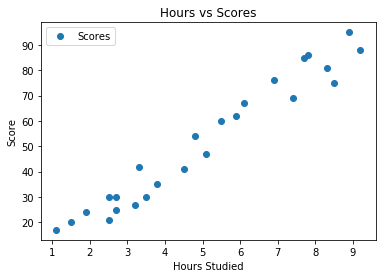

In [8]:
data.plot(x='Hours',y='Scores',style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [9]:
corr = data.corr() 
corr


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


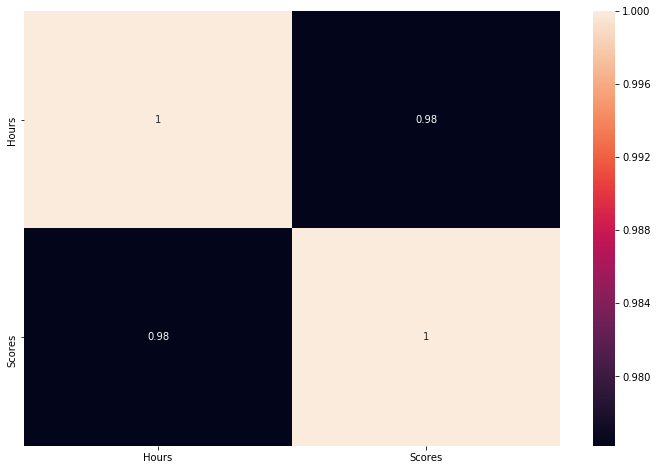

In [10]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

# Preparing data and Spliting it into Training and Test Sets

In [11]:
Y=data['Scores'].values

In [12]:
del data['Scores']

In [13]:
X=data.values

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
Y.reshape(-1,1)


array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split  
xtrain , xtest , ytrain, ytest =train_test_split(X,Y,test_size=0.2,
                                                 random_state=99)

In [17]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# predicting the test set results 
y_pred = model.predict(xtest)

#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

2.2716695350189227
[9.71616788]


In [19]:
y_pred

array([77.08616222, 20.73238851, 45.994425  , 28.50532281, 48.90927537])

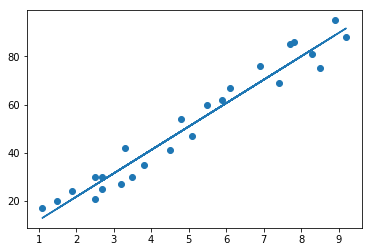

In [20]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [21]:
print(xtest)
y_pred = model.predict(xtest)

[[7.7]
 [1.9]
 [4.5]
 [2.7]
 [4.8]]


In [22]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,85,77.086162
1,24,20.732389
2,41,45.994425
3,30,28.505323
4,54,48.909275


# Prediction and Model Evaluation 

In [23]:
hours = 9.25
score_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14622243782992


In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, y_pred)) 

Mean Absolute Error: 4.552255217898514
